# Effects of Loan Amount and Prosper Ratings on Borrower's Annual Percentage Rate.

## by Rachael Olakunmi Ogunye

## Investigation Overview


> In this investigation, I wanted to look at how Loan amounts and Prosper ratings can be used to predict the Borrower's APR. 



## Dataset Overview

> There were 113,937 entries in the main dataset with 81 features from which the subset dataset (df_loan) was extracted, assessed and cleaned to produce the 'CleanedLoanData' consisting of 83982 loan entries with 21 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, ProsperRating (Alpha), EmploymentStatus and many others).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe, in this case the 'CleanedLoanData.csv'

df_loan = pd.read_csv('CleanedLoanData.csv')
df_loan.shape

(83736, 21)

## Distribution of Borrower Annual Percentage Rate (APR)

> The BorrowerAPR is the annual cost of a loan to a borrower. 

> The distribution is a normal multimodal distribution with small peaks around 0.1, 0.2 and 0.3. There is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43. BorrowerAPR is the main variable of interest.

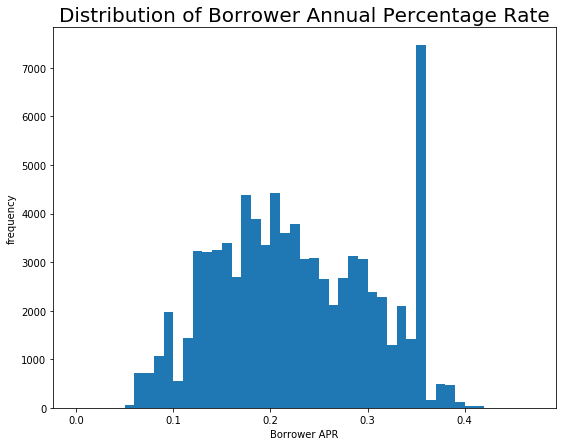

In [3]:
# the distribution of the main variable of interest: BorrowerAPR
        
bins = np.arange(0, df_loan.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[9, 7])
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.ylabel('frequency');
plt.title('Distribution of Borrower Annual Percentage Rate', fontsize=20);

## Distribution of Loan amount

> LoanOriginalAmount: The origination amount of the loan.

> Very large spikes in frequency are observed at 10k, 15k, 20k, 25k and 35k. . It means that most of the loans are multiples of 5k. There are also small spikes at 8k, 9k, 11k, 12k, 13k, 14k etc. It means that some of the loans are in multiples of 1k.

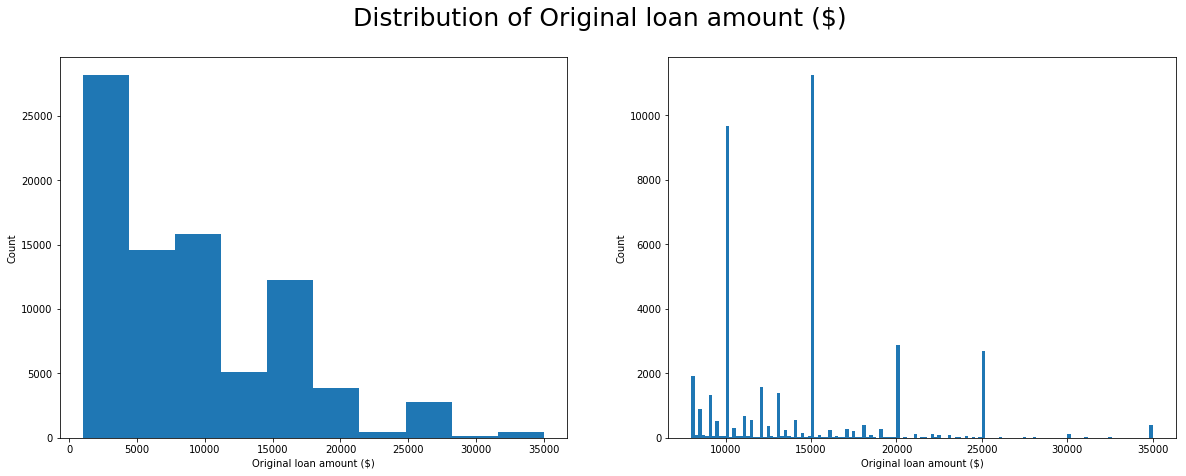

In [4]:
# distribution of LoanOriginalAmount

plt.figure(figsize = [20,7])
plt.suptitle('Distribution of Original loan amount ($)', fontsize=25)
plt.subplot(1,2,1)
plt.hist(df_loan['LoanOriginalAmount']);
plt.xlabel('Original loan amount ($)');
plt.ylabel('Count');

plt.subplot(1,2,2)
bins = np.arange(8000, df_loan.LoanOriginalAmount.max()+200, 200)
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)')
plt.ylabel('Count');

## Distribution of Prosper Ratings

> ProsperRating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR.

> The ratings of most of the borrowers are among D to A with C being the highest rating.

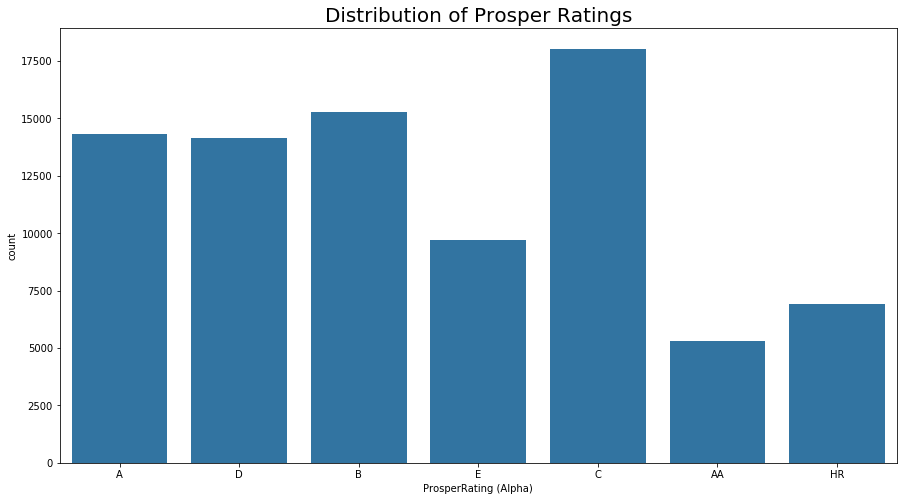

In [5]:
# the distribution of ProsperRating

plt.figure(figsize = [15,8])
base_color = sb.color_palette()[0]
sb.countplot(data = df_loan, x = 'ProsperRating (Alpha)', color = base_color);
plt.title('Distribution of Prosper Ratings', fontsize=20);

## Relationship between BorrowerAPR and Loan Amount

> This plot shows that at different loan amounts, the APR has a wide range, but the range of APR decreases with increasing loan amount. The plot shows that the borrowerAPR is negatively correlated with loan amount.

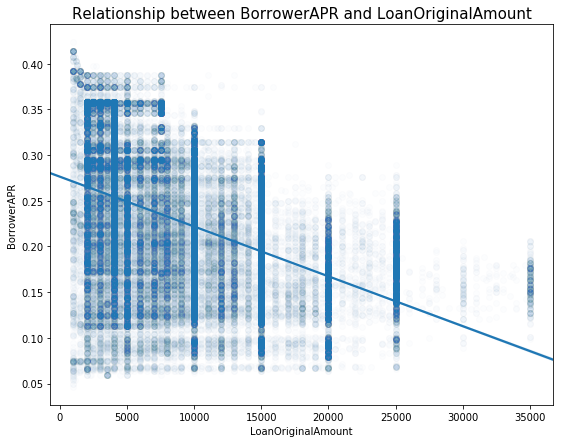

In [6]:
# code outputs a regression plot

plt.figure(figsize = [9, 7])
sb.regplot(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});
plt.title('Relationship between BorrowerAPR and LoanOriginalAmount', fontsize=15);

## Relationship between BorrowerAPR and Prosper Ratings

> The borrower's annual percentage rate (APR) decreases with increasing Prosper ratings. Borrowers with the best Prosper ratings have the lowest APR. This means that the Prosper rating has a strong effect on BorrowerAPR and BorrowerRate.

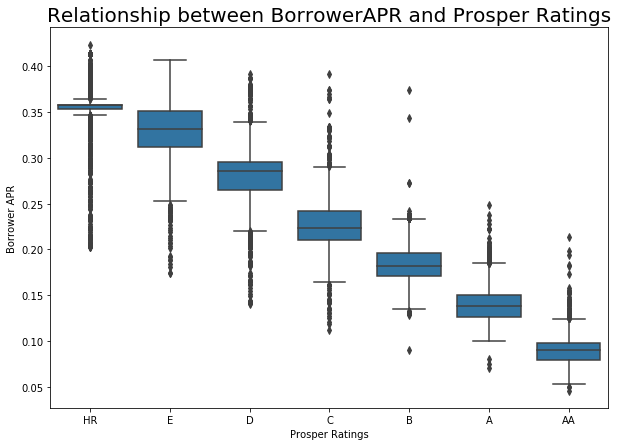

In [7]:
plt.figure(figsize=[10,7])
base_color = sb.color_palette()[0]
order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
sb.boxplot(data=df_loan, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color, order=order);
plt.xlabel('Prosper Ratings')
plt.ylabel('Borrower APR')
plt.title('Relationship between BorrowerAPR and Prosper Ratings', fontsize=20);

## Relationship between BorrowerAPR, Prosper Ratings and Loan Amount

> The loan amount increases with increasing Prosper rating while the borrower's APR decreases with increasing Prosper rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to AA. This may be because people with higher ratings tend to borrow more money and increasing the borrower's APR could deter them from borrowing more and minimizes the business profit. However, people with lower ratings tend to borrow less money, decreasing the borrower's APR could encourage them to borrow more.

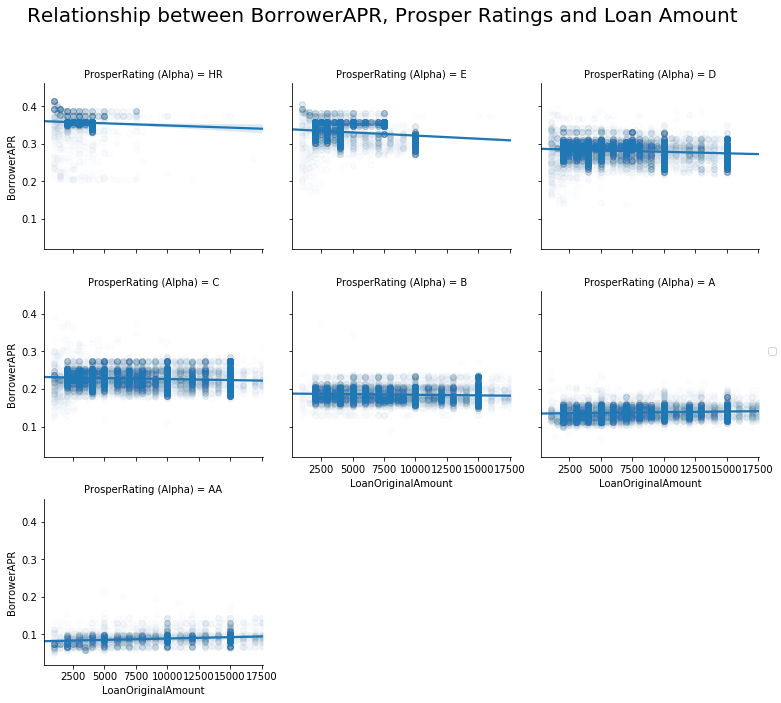

In [8]:
# code uses a regplot to show the relationship between the features

col_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
g = sb.FacetGrid(data=df_loan, aspect=1.2, col='ProsperRating (Alpha)', col_wrap=3, col_order=order)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.01});
# plt.title('Relationship between BorrowerAPR, ProsperRating and LoanOriginalAmount');
g.fig.suptitle('Relationship between BorrowerAPR, Prosper Ratings and Loan Amount', fontsize=20, y=1.08);
g.add_legend();